In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [3]:
!ls ../Datasets/AirQuality

AirQualityData_1 AirQualityData_2 Link.txt         Purple Air


In [2]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_2/AirQualityData_2_byCounty_Monthly.csv', low_memory =False)
airQ_data.tail()

,County,Year,MonthNo,Value
3535,Yolo,2019,8,6.658065
3536,Yolo,2019,9,5.130000
3537,Yolo,2019,10,9.777419
3538,Yolo,2019,11,8.803333
3539,Yolo,2019,12,0.000000


In [3]:
#monthly -> yearly Mean value: method 1
airQ_data_mean = airQ_data.groupby(['County','Year'])['Value'].mean().reset_index()
airQ_data_mean.head()

,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [6]:
len(airQ_data_mean)

295

In [4]:
#monthly -> yearly Mean value: method 2
airQ_data_mean1 = airQ_data.groupby(['County','Year'], as_index=False)['Value'].mean()
airQ_data_mean1.head()

,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [5]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['Value'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [9]:
len(airQ_data_mean)

295

In [10]:
airQ_data_mean['County'].unique()

array(['Alameda', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa',
       'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Humboldt ', 'Imperial', 'Inyo', 'Kern', 'Kings', 'LA', 'Lake',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Ventura', 'Yolo'], dtype=object)

In [6]:
airQ_data_mean.head()

,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [172]:
#we will use this asthma4 data-Age Quality
ashtma4 = pd.read_csv('../Datasets/Disease cases/asthma_2014_2017.csv', low_memory=False)
ashtma4.tail()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,Age group
1411,6107,45.0,43.1,47.0,"2,132",2017,All ages
1412,6109,45.0,39.5,51.0,244,2017,All ages
1413,6111,32.9,31.7,34.1,"2,826",2017,All ages
1414,6113,40.4,37.8,43.2,890,2017,All ages
1415,6115,47.6,42.8,52.7,366,2017,All ages


In [8]:
#county-countycode mapping file
county_code = pd.read_csv('../Datasets/Disease cases/asthma-4/County_codes.csv',low_memory=False)
county_code.head()

,County,CountyCode
0,Alameda,6001
1,Amador,6005
2,Butte,6007
3,Calaveras,6009
4,California/Statewide,6000


In [173]:
#merging asthma4 data with county code data to get county names

ashtma4_final = pd.merge(ashtma4,county_code,on='CountyCode')
ashtma4_final.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,Age group,County
0,6000,102.5,101.3,103.7,"26,225",2014,ages (0-4),California/Statewide
1,6000,72.0,71.4,72.7,"47,516",2014,ages (5-17),California/Statewide
2,6000,39.9,39.5,40.3,"38,153",2014,ages (18-34),California/Statewide
3,6000,38.5,38.2,38.9,"57,281",2014,ages (35-64),California/Statewide
4,6000,35.6,35.1,36.1,"17,365",2014,Above 65,California/Statewide


In [15]:
ashtma4_final['County'].unique()

array(['California/Statewide', 'Alameda ', 'Amador ', 'Butte ',
       'Calaveras ', 'Colusa ', 'Contra Costa ', 'Del Norte ',
       'El Dorado ', 'Fresno ', 'Glenn ', 'Humboldt ', 'Imperial ',
       'Inyo ', 'Kern ', 'Kings ', 'Lake ', 'Lassen ', 'Los Angeles ',
       'Madera ', 'Marin ', 'Mariposa ', 'Mendocino ', 'Merced ',
       'Modoc ', 'Mono ', 'Monterey ', 'Napa ', 'Nevada ', 'Orange ',
       'Placer ', 'Plumas ', 'Riverside ', 'Sacramento ', 'San Benito ',
       'San Bernardino ', 'San Diego ', 'San Francisco ', 'San Joaquin ',
       'San Luis Obispo ', 'San Mateo ', 'Santa Barbara ', 'Santa Clara ',
       'Santa Cruz ', 'Shasta ', 'Siskiyou ', 'Solano ', 'Sonoma ',
       'Stanislaus ', 'Sutter ', 'Tehama ', 'Trinity ', 'Tulare ',
       'Tuolumne ', 'Ventura ', 'Yolo ', 'Yuba '], dtype=object)

In [174]:
ashtma4_final['County'] = ashtma4_final['County'].str.strip()
ashtma4_final['County']

0       California/Statewide
1       California/Statewide
2       California/Statewide
3       California/Statewide
4       California/Statewide
                ...         
1363                    Yuba
1364                    Yuba
1365                    Yuba
1366                    Yuba
1367                    Yuba
Name: County, Length: 1368, dtype: object

In [176]:
ashtma4_final.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,Age group,County
0,6000,102.5,101.3,103.7,"26,225",2014,ages (0-4),California/Statewide
1,6000,72.0,71.4,72.7,"47,516",2014,ages (5-17),California/Statewide
2,6000,39.9,39.5,40.3,"38,153",2014,ages (18-34),California/Statewide
3,6000,38.5,38.2,38.9,"57,281",2014,ages (35-64),California/Statewide
4,6000,35.6,35.1,36.1,"17,365",2014,Above 65,California/Statewide


In [12]:
airQ_data_mean['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

In [178]:
#merging AQ data && asthma4 data

merged = pd.merge(airQ_data_mean,ashtma4_final,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])

In [179]:
merged['Patient_count'] = merged['Patient_count'].str.replace(',','').astype(int)

In [94]:
len(merged)

980

In [95]:
merged

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4)
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17)
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34)
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64)
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65
...,...,...,...,...,...,...,...,...,...
975,Yolo,2017,10.430445,6113,60.6,47.8,75.9,76,ages (0-4)
976,Yolo,2017,10.430445,6113,59.3,51.6,67.7,217,ages (5-17)
977,Yolo,2017,10.430445,6113,34.4,30.3,39.0,249,ages (18-34)
978,Yolo,2017,10.430445,6113,34.4,30.2,38.9,246,ages (35-64)


In [181]:
merged['Age group']=merged['Age group'].astype('category')

In [24]:
merged2_filtered = ashtma4_final[ashtma4_final['County'] == 'Santa Clara']

In [25]:
merged2_filtered.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,Age group,County
840,6085,54.4,50.4,58.7,676,2014,ages (0-4),Santa Clara
841,6085,36.8,34.7,39.0,"1,171",2014,ages (5-17),Santa Clara
842,6085,26.3,24.7,27.8,"1,118",2014,ages (18-34),Santa Clara
843,6085,25.8,24.7,26.9,"1,973",2014,ages (35-64),Santa Clara
844,6085,31.1,28.9,33.5,705,2014,Above 65,Santa Clara


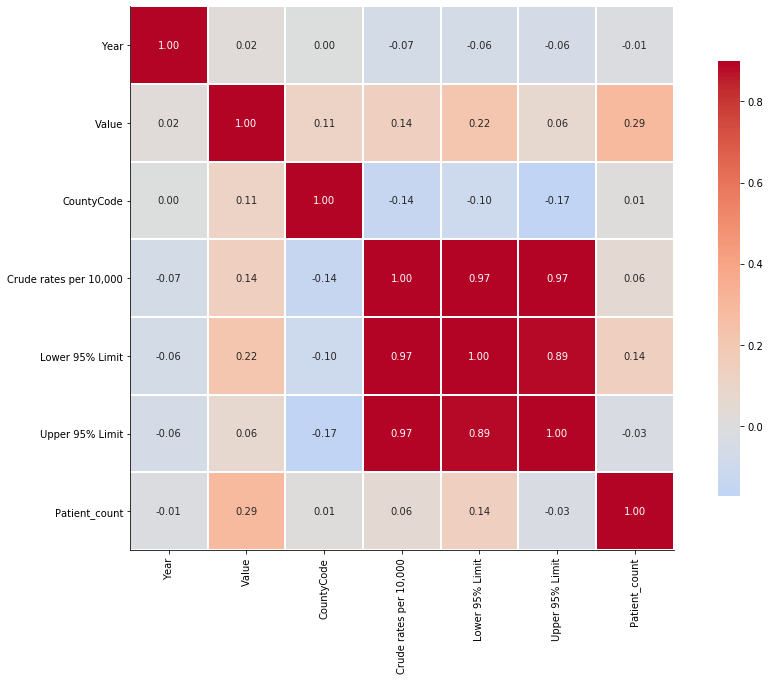

In [182]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

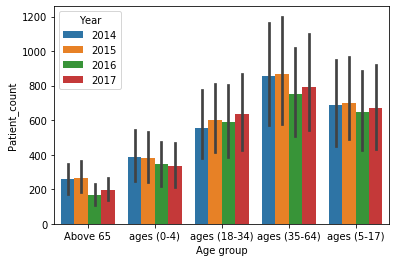

In [27]:
sns.barplot(x='Age group', y='Patient_count', hue='Year', data=merged, saturation=0.8)


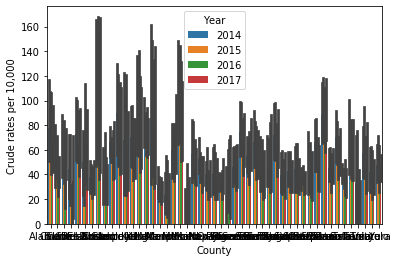

In [28]:
sns.barplot(x='County', y='Crude rates per 10,000', hue='Year', data=merged, saturation=0.8)



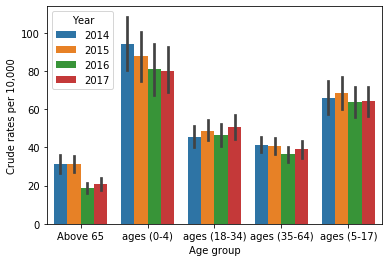

In [29]:
sns.barplot(x='Age group', y='Crude rates per 10,000', hue='Year', data=merged, saturation=0.8)

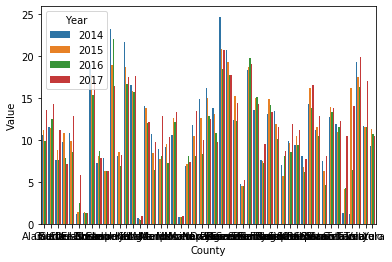

In [30]:
sns.barplot(x='County', y='Value', hue='Year', data=merged, saturation=0.8)



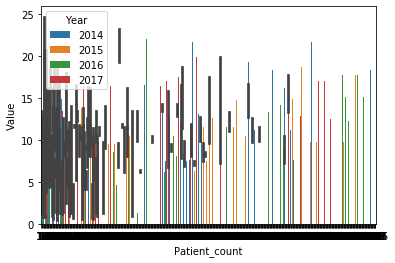

In [31]:
sns.barplot(x='Patient_count', y='Value', hue='Year', data=merged, saturation=0.8)



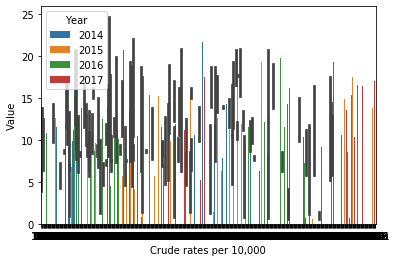

In [34]:
sns.barplot(x='Crude rates per 10,000', y='Value', hue='Year', data=merged, saturation=0.8)



In [98]:
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4)
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17)
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34)
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64)
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65


In [99]:
#county population file
county_population = pd.read_csv('../Datasets/Disease cases/asthma-4/county_population.csv',low_memory=False)
county_population.head()

,County,Year,Population
0,Alameda,2014,"1,588,576"
1,Alpine,2014,"1,163"
2,Amador,2014,"37,815"
3,Butte,2014,"223,137"
4,Calaveras,2014,"45,358"


In [100]:
#remove comma from Population column
county_population['Population'] = county_population['Population'].str.replace(',','').astype(int)
county_population.head()

,County,Year,Population
0,Alameda,2014,1588576
1,Alpine,2014,1163
2,Amador,2014,37815
3,Butte,2014,223137
4,Calaveras,2014,45358


In [189]:
#merging merged data && county_population data to get population column

merged = pd.merge(merged,county_population,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,AgeGroupCat,Population
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),2,1588576
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),5,1588576
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),3,1588576
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),4,1588576
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,0,1588576


In [190]:
#Calculating patient ratio

merged['Patient_ratio'] = merged['Patient_count']/merged['Population']
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,AgeGroupCat,Population,Patient_ratio
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),2,1588576,0.000936
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),5,1588576,0.001322
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),3,1588576,0.001137
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),4,1588576,0.002206
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,0,1588576,0.000636


In [191]:
#Calculating patient percentage

merged['Patient_percent%'] = merged['Patient_ratio']* 10000
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,AgeGroupCat,Population,Patient_ratio,Patient_percent%
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),2,1588576,0.000936,9.360585
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),5,1588576,0.001322,13.219386
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),3,1588576,0.001137,11.368672
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),4,1588576,0.002206,22.063785
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,0,1588576,0.000636,6.364190


In [183]:
merged.dtypes
merged['AgeGroupCat']= merged['Age group'].cat.codes

In [192]:
merged.tail()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,AgeGroupCat,Population,Patient_ratio,Patient_percent%
1171,Yolo,2017,10.430445,6113,59.3,51.6,67.7,217,ages (5-17),5,218673,0.000992,9.923493
1172,Yolo,2017,10.430445,6113,34.4,30.3,39.0,249,ages (18-34),3,218673,0.001139,11.386865
1173,Yolo,2017,10.430445,6113,34.4,30.2,38.9,246,ages (35-64),4,218673,0.001125,11.249674
1174,Yolo,2017,10.430445,6113,37.7,30.7,45.8,102,Above 65,0,218673,0.000466,4.664499
1175,Yolo,2017,10.430445,6113,40.4,37.8,43.2,890,All ages,1,218673,0.004070,40.700041


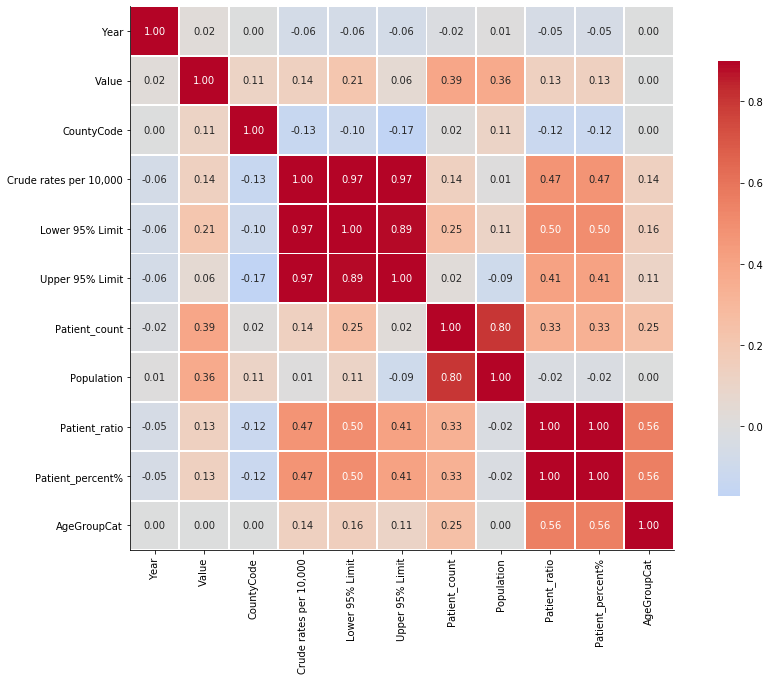

In [82]:
#again measuring the correlation - without applying county filter

corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

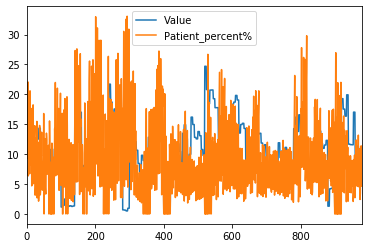

In [45]:
#plotting AQ index value vs. patient ratio
merged[['Value','Patient_percent%']].plot()

In [ ]:
merged[['Value','Crude rates per 10,000']].plot()

In [ ]:
len(merged['County'].unique())

In [ ]:
merged_filter_for_plot = merged[(merged['County'].isin(['Santa Clara']))]
merged_filter_for_plot

In [ ]:
#plotting AQ index value vs. patient ratio
merged_filter_for_plot[['Value','Patient_percent%']].plot()

In [ ]:
merged_filter_for_plot[['Value','Crude rates per 10,000']].plot()

In [ ]:
merged_filter_for_plot

In [ ]:
plt.figure()

x = merged_filter_for_plot['Crude rates per 10,000']
y = merged_filter_for_plot['Value']


plt.plot(x,y)


In [ ]:
plt.figure()

x = merged_filter_for_plot['Year']
y = merged_filter_for_plot['Patient_percent%']

plt.plot(x,y)

In [ ]:
plt.figure()

x = merged_filter_for_plot['Value']
y = merged_filter_for_plot['Year']

plt.plot(y,x)

In [ ]:
plt.figure()

x = merged_filter_for_plot['Year']
y1 = merged_filter_for_plot['Patient_ratio'] * 10000
y2 = merged_filter_for_plot['Value']

plt.plot(x,y1)
plt.plot(x,y2)

In [ ]:
min(merged['Value'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


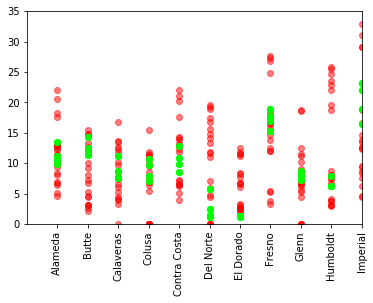

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = merged['County']
y1 = merged['Patient_percent%']
y2 = merged['Value']
y3 = merged['Age group']
#plt.axes([6000,6200,10,10])

r_colors = (1,0,0)
g_colors = (0,1,0)
colors = (1,0,0)


plt.scatter(x, y1,  c=r_colors, alpha=0.5)
plt.scatter(x, y2,  c=g_colors, alpha=0.5)


plt.axis([-1,10,0,35])
plt.xticks(rotation=90)
# ax.plot(x,y1)
# ax.plot(x,y2)
ax.set_aspect(aspect=0.2)



In [169]:
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,Population,Patient_ratio,AgeGroupCat,Patient_percent%
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),1588576,0.000936,1,9.360585
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),1588576,0.001322,4,13.219386
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),1588576,0.001137,2,11.368672
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),1588576,0.002206,3,22.063785
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,1588576,0.000636,0,6.364190


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = merged['County']
y1 = merged['Crude rates per 10,000'] / 10
y2 = merged['Value']
y3 = merged['Age group']
#plt.axes([6000,6200,10,10])

r_colors = (1,0,0)
g_colors = (0,1,0)
b_colors = (0,0,1)
colors = (1,0,0)


plt.scatter(x, y1,  c=r_colors, alpha=0.5)
plt.scatter(x, y2,  c=g_colors, alpha=0.5)
#plt.scatter(x,y3, c=b_colors, alpha=0.5)

plt.axis([0,10,0,30])
plt.xticks(rotation=90)
# ax.plot(x,y1)
# ax.plot(x,y2)
ax.set_aspect(aspect=0.2)

In [ ]:
plt.figure(figsize=[10,8])
x = 0.3*np.random.randn(1000)
y = 0.3*np.random.randn(1000)

x = merged['County']
y1 = merged['Crude rates per 10,000'] / 10
y2 = merged['Value']
y3 = merged['AgeGroupCat']

plt.xticks(rotation=90)
n, bins, patches = plt.hist([y2,y1], bins = 'auto')
plt.xlabel('County')
#plt.hist(y2, bins, histtype='step', label=['second again'])



In [ ]:
means = 10, 20
stdevs = 4,2
dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),columns=['Value','Crude rates per 10,000'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

In [ ]:
fig, ax = plt.subplots()

dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [ ]:
merged.head()

In [ ]:
import plotly.figure_factory as ff

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=merged['County'], values=merged['Crude rates per 10,000'], scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
fig.layout.template = None
fig.show()

In [ ]:
! conda install -c plotly plotly-geo geopandas -y

In [ ]:
! conda install pyshp -y

In [ ]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

In [ ]:
y1.shape

In [ ]:
#merged.groupby('County')

airQ_data_min = merged.groupby(['County', 'Age group', 'Year'], as_index=False)['Crude rates per 10,000'].max()
airQ_data_min.head()

In [ ]:
merged[merged['County'] == 'Alameda']

In [ ]:
sns.distplot(merged_filter_for_plot['Patient_ratio'])
plt.show()

In [ ]:
sns.distplot(merged_filter_for_plot['Patient_ratio']* 10000)
plt.show()

In [ ]:
sns.distplot(merged_filter_for_plot['Value'])
plt.show()

In [ ]:
# Method 1: on the same Axis
sns.distplot( (merged_filter_for_plot["Patient_percent%"]) , color="blue", label="Patient_ratio")
sns.distplot( merged_filter_for_plot["Value"] , color="red", label="Value")
plt.legend()
 
plt.show()


In [ ]:
merged_filter_for_plot.Value = merged_filter_for_plot.Value.astype(float)
merged_filter_for_plot

In [ ]:
merged

In [ ]:
# Prep Training and Test data.
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

In [ ]:
#X and Y(target) for linear regression
Y_trainData = trainData[['Crude rates per 10,000']]
X_trainData= trainData.drop('Crude rates per 10,000', axis =1 )

Y_testData = testData[['Crude rates per 10,000']]
X_testData= testData.drop('Crude rates per 10,000', axis =1 )
X_trainData = X_trainData.drop('County', axis=1)

In [ ]:

X_testData = X_testData.drop('County', axis=1)
X_testData

In [ ]:
# Creating linear regression model.
model1= LinearRegression()

In [ ]:
model1.fit(X_trainData,Y_trainData)
predictions = model1.predict(X_testData)

In [ ]:
# Get the slope and intercept of the line best fit.
print(model1.intercept_)


print(model1.coef_)

In [ ]:
# print the R-squared value for the model
model1.score(X_trainData, Y_trainData)

In [ ]:
# print the R-squared value for the model
print(model1.score(X_testData,Y_testData)  )

In [ ]:
#X and Y(target) for logistic regression 
X_trainData = trainData[['Value','CountyCode']]
Y_trainData= trainData.Patient_ratio
X_testData= testData[['Value','CountyCode']]
Y_testData= testData.Patient_ratio

In [ ]:
Y_trainData = trainData[['Crude rates per 10,000']]
X_trainData= trainData.drop('Crude rates per 10,000', axis =1 )

Y_testData = testData[['Crude rates per 10,000']]
X_testData= testData.drop('Crude rates per 10,000', axis =1 )
X_trainData = X_trainData.drop('County', axis=1)
X_testData = X_testData.drop('County', axis=1)



In [ ]:
X_testData

In [ ]:
# Creating Logistic regression model.
model2= LogisticRegression()

In [ ]:
model2.fit(X_trainData,Y_trainData)
predictions = model2.predict(X_testData)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    merged.drop(labels=['Crude rates per 10,000', 'County'], axis=1),
    merged['Crude rates per 10,000'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

In [ ]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)




In [ ]:
print(clf.intercept_)


print(clf.coef_)

In [ ]:
np.round(clf.coef_, decimals=2) > 0

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(clf, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

In [ ]:
order = selector.ranking_
order

In [ ]:
feature_ranks = []

for i in order:
    feature_ranks.append(f"{i}.{merged.columns[i]}")

feature_ranks    

In [ ]:
x_train_filtered = X_train[X_train['Year'] == 2016]
#x_train_filtered['CountyCode']
x_train_filtered

In [ ]:
# Poisson regression code

import statsmodels.api as sm
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

#x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
#y = poisson(mu)


filtered = merged[merged['Year'] == 2016].reset_index() 

x = filtered['CountyCode']
y = filtered['Value']


exog, endog = sm.add_constant(x), y

# Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())


In [ ]:
filtered.head()

In [ ]:

y_pred = res.predict(exog)

y_pred.head()


In [ ]:
idx = np.array(x).argsort()
x_ord, y_pred_ord = np.array(x[idx]), y_pred[idx]



In [ ]:
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")



In [ ]:
X_train['Value']

In [ ]:
mu

In [49]:
merged['Date_Time'] = pd.to_datetime(merged.Year , format = '%Y')
merged.index = merged.Date_Time

In [ ]:
from pyramid import arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [201]:


merged.head()



,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,AgeGroupCat,Population,Patient_ratio,Patient_percent%
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),2,1588576,0.000936,9.360585
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),5,1588576,0.001322,13.219386
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),3,1588576,0.001137,11.368672
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),4,1588576,0.002206,22.063785
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,0,1588576,0.000636,6.364190


In [193]:
merged = merged.reset_index(drop=True)  
columns = ['CountyCode','Value','Patient_percent%','Year','AgeGroupCat']

merged_features = merged[columns]
#merged_features['Patient_percent%'] =  merged_features['Patient_percent%']/10   


In [204]:
#creating the train and validation set
train = merged_features[:int(0.8*(len(merged_features)))]
valid = merged_features[int(0.8*(len(merged_features))):]



In [205]:
train_array = np.asarray(train)
valid_array = np.asarray(valid)

In [206]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_array)
model_fit = model.fit()
model_fit.y

/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[6.00100000e+03, 1.06155720e+01, 9.36058457e+00, 2.01400000e+03,
        2.00000000e+00],
       [6.00100000e+03, 1.06155720e+01, 1.32193864e+01, 2.01400000e+03,
        5.00000000e+00],
       [6.00100000e+03, 1.06155720e+01, 1.13686723e+01, 2.01400000e+03,
        3.00000000e+00],
       ...,
       [6.08900000e+03, 1.42615329e+01, 1.15751743e+01, 2.01400000e+03,
        5.00000000e+00],
       [6.08900000e+03, 1.42615329e+01, 1.57690781e+01, 2.01400000e+03,
        3.00000000e+00],
       [6.08900000e+03, 1.42615329e+01, 2.31503487e+01, 2.01400000e+03,
        4.00000000e+00]])

In [207]:

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid_array))
prediction

array([[6.08896567e+03, 1.40112146e+01, 5.44065339e+00, 2.01428978e+03,
        2.23966790e+00],
       [6.08882780e+03, 1.38587045e+01, 1.74594828e+01, 2.01451793e+03,
        2.72129275e+00],
       [6.08883268e+03, 1.36861625e+01, 1.16472633e+01, 2.01470432e+03,
        2.43034087e+00],
       ...,
       [6.10527466e+03, 1.24891987e+01, 1.15407520e+01, 2.01547337e+03,
        2.52200558e+00],
       [6.10534448e+03, 1.24911842e+01, 1.15357312e+01, 2.01547334e+03,
        2.52202645e+00],
       [6.10541426e+03, 1.24931689e+01, 1.15307125e+01, 2.01547332e+03,
        2.52204731e+00]])

In [208]:
cols = train.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)

In [209]:

from sklearn.metrics import mean_squared_error 

for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for CountyCode is :  5.6848678059978175
rmse value for Value is :  4.475536554593296
rmse value for Patient_percent% is :  16.88658666085344
rmse value for Year is :  1.1043245391003889


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [100]:
#make final predictions
model = VAR(endog=merged_features)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[6.11332270e+03 1.06968447e+01 6.01133381e+01 2.58798065e+00]]


/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [194]:
from sklearn.model_selection import train_test_split

y=  merged_features['Patient_percent%']
X= merged_features.drop('Patient_percent%' , axis =1)  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [195]:


y_train1 = np.asarray(y_train.values, dtype="int")
y_test1 = np.asarray(y_test.values, dtype="int")

In [196]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train1)

y_pred=clf.predict(X_test)

In [197]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred)*100

13.314447592067987

In [198]:
y_test1, y_pred

(array([14, 29,  5,  7,  2,  9,  6, 40, 36,  0, 19,  6,  2,  2, 81, 59,  4,
        15, 10,  2,  8,  8,  2, 34, 22,  4,  3,  5, 16,  4,  3, 33,  4,  4,
         0,  0,  6, 12, 27,  7,  5, 17, 37,  4, 62,  4, 78,  9, 22,  5,  7,
        14, 16, 28, 11, 13, 58, 22,  7, 12,  8,  9, 22,  4, 39,  5, 63,  2,
        12, 26,  8,  8, 74,  6, 15, 10, 13,  5, 12,  4, 48, 14,  3, 13, 30,
         7, 13,  7, 60, 17, 35,  6, 13, 11, 16,  7,  8, 25,  3,  2, 61,  4,
         4,  1, 10,  2, 11, 43, 12,  0, 30, 13,  6, 19, 13, 14,  5, 30, 55,
        13,  4, 11, 23,  9, 52, 46,  2,  7,  4,  4,  4, 12, 13,  5, 14, 10,
         6, 14,  0,  3,  3,  8,  0, 22, 50, 11,  0, 14,  4,  6,  0, 17, 11,
         3, 12,  8,  3, 61,  4, 15,  2, 12,  5,  2, 21,  0, 48,  4,  8,  4,
         4,  7,  5, 14,  8, 44, 10,  7,  7, 59, 21,  5, 24,  3, 40, 17,  7,
         0, 14, 35,  2, 21, 23, 21, 15,  9, 19,  3, 10,  9,  7, 18, 11, 26,
         0,  7,  4, 15,  6,  6,  9,  9,  4,  0, 18, 10,  6,  6, 20, 34, 10,
        14, 